# Projeto Pandas
Nós fomos contratados como cientistas de dados de uma empresa imobiliária. Nossa principal função é dar suporte as demandas do time de Machine Learning e do time de Desenvolvimento dessa empresa.

Para atendermos essas demandas, foi disponibilizado um board no Trello, com as etapas e tarefas do projeto que devemos realizar. Também foi disponibilizada uma base de dados, que utilizaremos para desenvolver o projeto.

# Conhecendo a base de dados

A base de dados que vamos utilizar para desenvolver o projeto é uma base com dados de diferentes tipos de imóveis do Rio de Janeiro, como apartamento, casas, comércios, dentre outros.

Nessa base, nós vamos encontrar os valores dos aluguéis de cada imóvel, condomínio, IPTU e também suas características, como: quantidade de quartos, suítes, vagas de garagem, etc.

Link para acessar a base de dados: aluguel.csv

## Importando os dados


O primeiro passo para começarmos o projeto é importar a base de dados e verificar algumas características gerais, como:

- quantidade de linhas e colunas;

- quais as colunas da base de dados;

- explorar as diferentes colunas existentes;

- verificar os tipos dos dados.

In [2]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Importando os dados de um link
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'

In [4]:
# Carregando os primeiros dados 
dados = pd.read_csv(url, sep=';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [5]:
# Carregando os ultimos dados 
dados = pd.read_csv(url, sep=';')
dados.tail()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN
32959,Conjunto Comercial/Sala,Centro,0,0,0,250,6500.0,4206.0,1109.0


## Características gerais da base de dados

In [6]:
# Qual a quantidade de linhas da base de dados?
print(f'A quantidade de linhas é {dados.shape[0]} com {dados.shape[1]} colunas.')

A quantidade de linhas é 32960 com 9 colunas.


In [7]:
# Retornando as colunas
dados.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

In [8]:
# Quais os tipos dos dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [9]:
# Verificando a coluna tipo de imoveis 
dados['Tipo']

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [10]:
# Verificando a coluna tipo de imoveis 
dados[['Tipo','Quartos']]

,Tipo,Quartos
0,Quitinete,1
1,Casa,2
2,Conjunto Comercial/Sala,0
3,Apartamento,1
4,Apartamento,1
...,...,...
32955,Quitinete,0
32956,Apartamento,3
32957,Apartamento,2
32958,Apartamento,2


In [11]:
# Verificando a quantidade por tipo de imoveis 
dados['Tipo'].value_counts()

Tipo
Apartamento                    19532
Conjunto Comercial/Sala         6815
Loja/Salão                      1426
Casa de Condomínio               996
Casa                             967
Quitinete                        836
Galpão/Depósito/Armazém          623
Flat                             476
Prédio Inteiro                   301
Casa Comercial                   265
Casa de Vila                     249
Loja Shopping/ Ct Comercial      247
Box/Garagem                       82
Terreno Padrão                    70
Loft                              51
Sítio                             10
Loteamento/Condomínio              5
Studio                             4
Hotel                              2
Chácara                            1
Pousada/Chalé                      1
Indústria                          1
Name: count, dtype: int64

# Análise exploratória de dados

Algumas perguntas que podemos fazer nesse momento:

- Quais os valores médios de aluguel por tipo de imóvel?

- Qual o percentual de cada tipo de imóvel na nossa base de dados?

## Qual o valor médio de aluguel por tipo de imóvel?

In [12]:
# Qual o valor médio de aluguel por tipo de imovel
dados.groupby('Tipo')['Valor'].mean().sort_values(ascending=False)

Tipo
Prédio Inteiro                 498637.239203
Indústria                      120000.000000
Galpão/Depósito/Armazém         53407.062600
Terreno Padrão                  32567.714286
Hotel                           25000.000000
Loteamento/Condomínio           22000.000000
Conjunto Comercial/Sala         14715.045521
Casa Comercial                  14478.264151
Loja/Salão                      13769.646770
Sítio                           12499.000000
Casa de Condomínio              11952.061245
Loja Shopping/ Ct Comercial      8126.178862
Casa                             6793.454922
Chácara                          4900.000000
Apartamento                      4744.614648
Flat                             4546.189076
Loft                             2557.882353
Studio                           2400.000000
Box/Garagem                      1899.756098
Casa de Vila                     1574.369478
Pousada/Chalé                    1480.000000
Quitinete                        1246.840909
Name:

In [13]:
# Deixar como um dataframe
media_imoveis = dados.groupby('Tipo')[['Valor']].mean().sort_values(by='Valor')
media_imoveis.head(10)

,Valor
Tipo,
Quitinete,1246.840909
Pousada/Chalé,1480.000000
Casa de Vila,1574.369478
Box/Garagem,1899.756098
Studio,2400.000000
Loft,2557.882353
Flat,4546.189076
Apartamento,4744.614648
Chácara,4900.000000


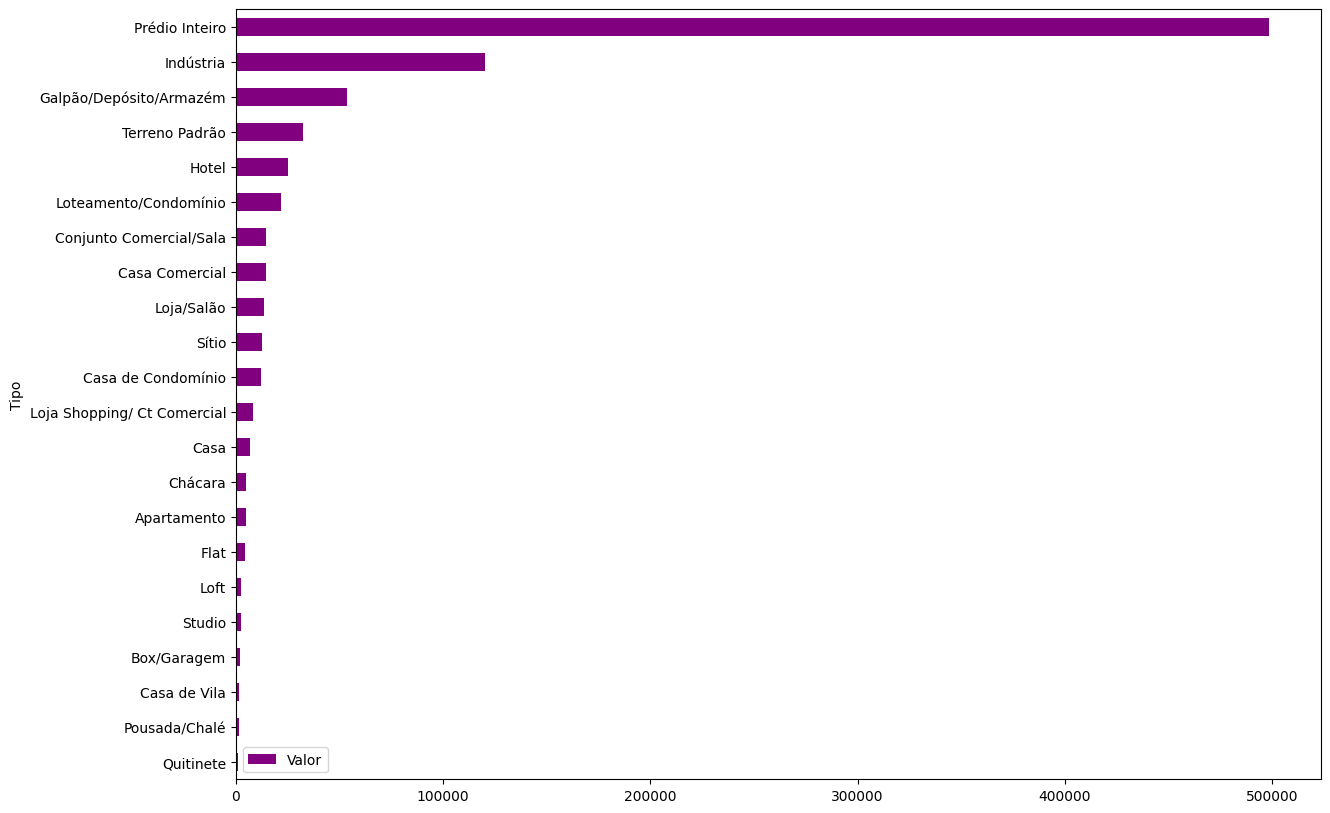

In [14]:
# Plotando um grafico 
media_imoveis.plot(kind='barh', figsize=(14,10), color='purple');


## Removendo os imóveis comerciais

In [15]:
# Retornando os valores unicos da coluna
dados.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [16]:
# Criando uma lista com os imoveis comerciais
imoveis_comerciais = ['Conjunto Comercial/Sala', 'Prédio Inteiro', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Terreno Padrão', 'Box/Garagem', 
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Hotel', 'Indústria']

In [17]:
# Retornando as linhas de imoveis comerciais, usando a função query e um @ para retornar todas as linhas
df_comercial =dados.query('@imoveis_comerciais in Tipo')

In [18]:
# Retornando as linhas de imoveis residenciais, usando a função query
df_residenciais = dados.query('@imoveis_comerciais not in Tipo')

In [19]:
# Verificando os valores unicos
df_residenciais['Tipo'].unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

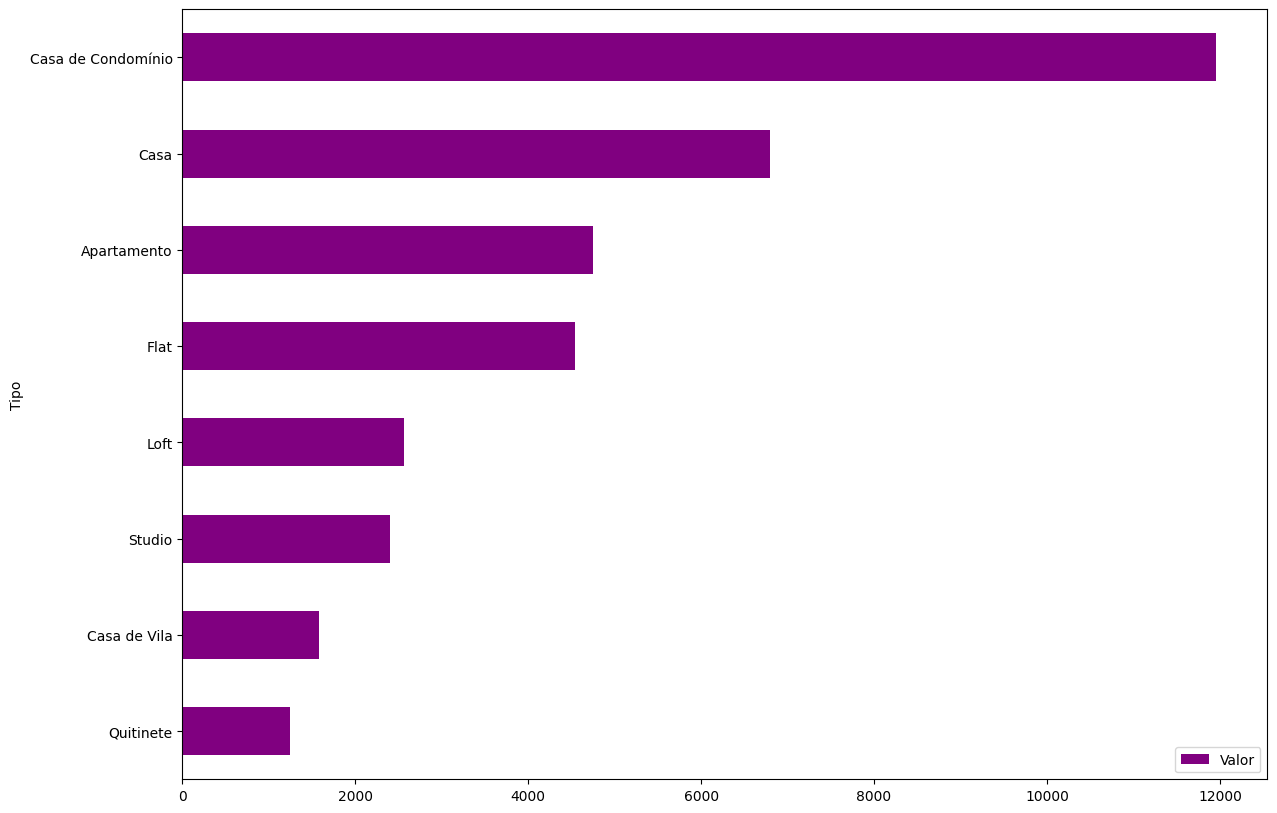

In [20]:
# Retornando a media a partir dos dados de imoveis residenciais
media_imoveis = df_residenciais.groupby('Tipo')[['Valor']].mean().sort_values(by='Valor')

# Plotando um grafico 
media_imoveis.plot(kind='barh', figsize=(14,10), color='purple');

## Qual o percentual de cada tipo de imóvel na nossa base de dados?

In [21]:
# Retornando a quantidade por tipo
df_residenciais['Tipo'].value_counts()

Tipo
Apartamento           19532
Casa de Condomínio      996
Casa                    967
Quitinete               836
Flat                    476
Casa de Vila            249
Loft                     51
Studio                    4
Name: count, dtype: int64

In [22]:
# Retornando o percentual por tipo
df_percentual_residencial = df_residenciais['Tipo'].value_counts(normalize=True).to_frame().sort_values('Tipo')
df_percentual_residencial.rename(columns={'proportion': 'Percentuais'}, inplace=True)
df_percentual_residencial

,Percentuais
Tipo,
Apartamento,0.845139
Casa,0.041842
Casa de Condomínio,0.043096
Casa de Vila,0.010774
Flat,0.020596
Loft,0.002207
Quitinete,0.036173
Studio,0.000173


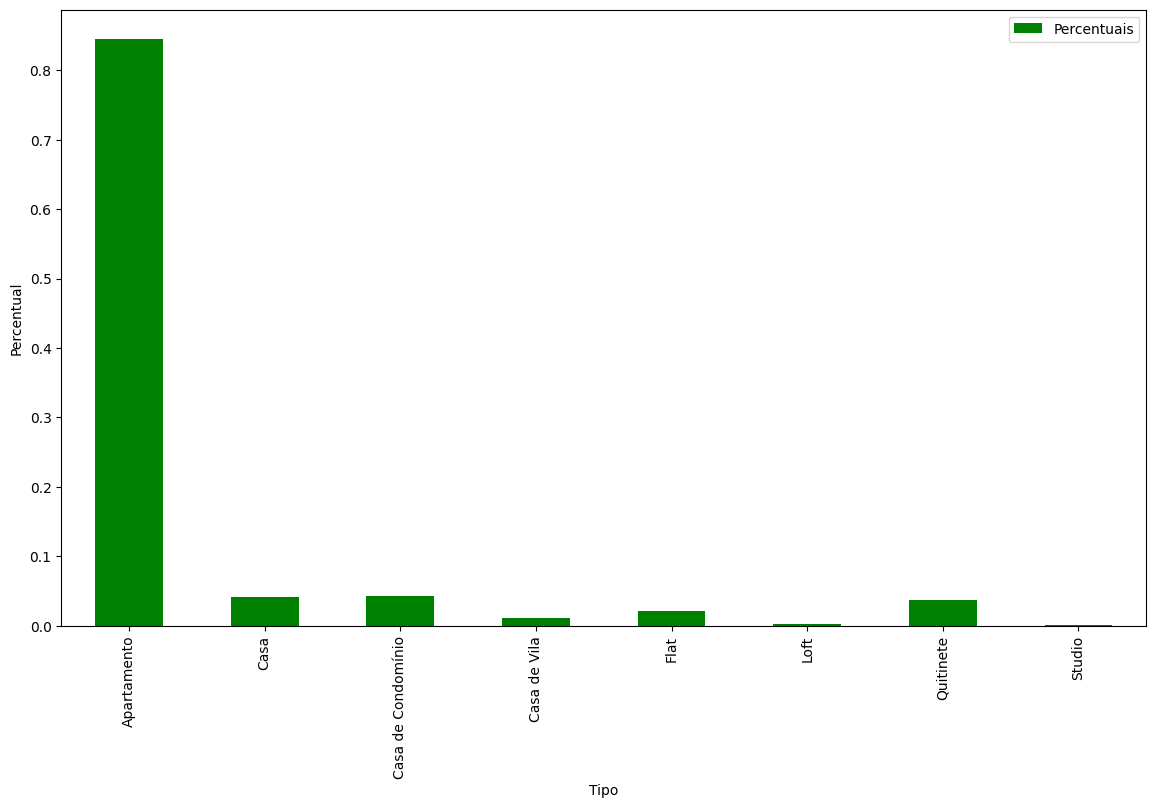

In [23]:
# Gerando um grafico
df_percentual_residencial.plot(kind='bar', figsize=(14,8), color='green', xlabel='Tipo', ylabel='Percentual');

### **Selecionando apenas os imóveis do tipo apartamento**

In [24]:
df_apartamentos = df_residenciais.query('Tipo == "Apartamento"')
df_apartamentos.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


O time de ML chegou com algumas demandas de última hora para resolvermos nesse momento da análise exploratória. Essas demandas são:

1) Calcular a média de quartos por apartamento;

2) Conferir quantos bairros únicos existem na nossa base de dados;

3) Analisar quais bairros possuem a média de valor de aluguel mais elevadas;

4) Criar um gráfico de barras horizontais que apresente os 5 bairros com as médias de valores de aluguel mais elevadas.

In [25]:
# Calcular a média de quarto por apartamento
df_residenciais['Quartos'].mean()

np.float64(2.4837523257323353)

In [26]:
# Quantos bairros unicos existem na base 
df_residenciais['Bairro'].nunique()

154

In [27]:
# Quais os bairros possuem a média do valor do aluguel mais elevado
media_bairros = df_residenciais.groupby('Bairro')[['Valor']].mean().sort_values('Valor', ascending=False)
media_bairros.head()

,Valor
Bairro,
Joá,16773.478261
Cidade Jardim,12000.000000
Arpoador,10896.062500
Paquetá,10550.000000
Ipanema,9196.116863


<Axes: xlabel='Bairros', ylabel='Valor Médio'>

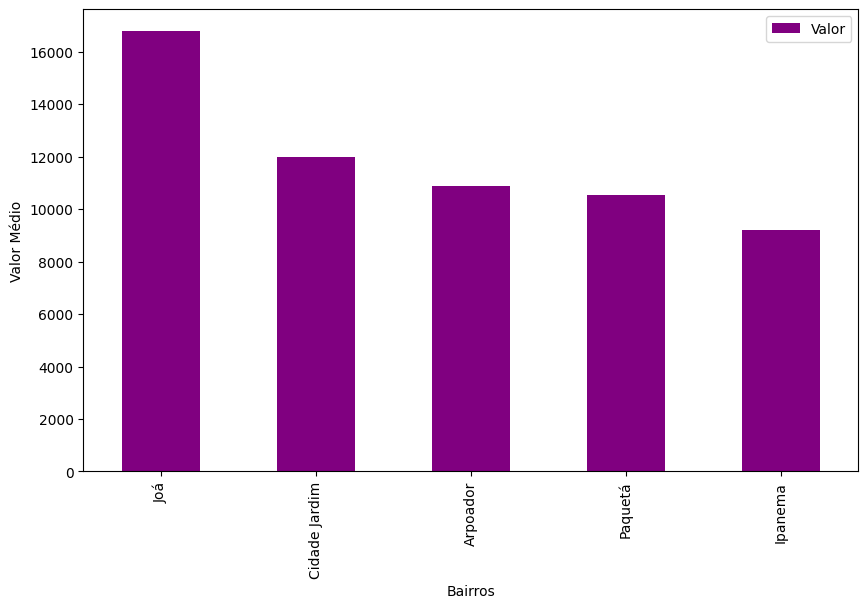

In [28]:
# Gerar um grafico com os 5 bairros mais elevados
media_bairros.head(5).plot(kind='bar', figsize=(10,6), color='purple', xlabel='Bairros', ylabel='Valor Médio')

# Tratando e filtrando os dados

## Lidando com dados nulos

In [29]:
# Retornando a quantidade de valores nulos
df_apartamentos.isnull().sum()

Tipo             0
Bairro           0
Quartos          0
Vagas            0
Suites           0
Area             0
Valor            7
Condominio     745
IPTU          5472
dtype: int64

In [30]:
# Tratando os valores nulos com valor 0
df_apartamentos = df_apartamentos.fillna(0)

In [31]:
# Quantidade dos valores por coluna
df_apartamentos.count()

Tipo          19532
Bairro        19532
Quartos       19532
Vagas         19532
Suites        19532
Area          19532
Valor         19532
Condominio    19532
IPTU          19532
dtype: int64

## Removendo registros

Alguns registros existentes na base de dados não fazem muito sentido, por exemplo:

- apartamentos que possuem valor de aluguel igual a 0;

- apartamentos com o valor do condomínio igual a 0.

Esses registros são inconsistentes, por isso devemos removê-los da nossa base de dados.

In [32]:
# Localizando os valores diferentes de 0 no aluguel e condominio, salvando no dataframe
df_apartamentos = df_apartamentos.loc[(df_apartamentos['Valor'] != 0) & (df_apartamentos['Condominio'] != 0)]

In [33]:
# Verificando as alterações
df_apartamentos.query('Valor == 0 | Condominio == 0')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


In [34]:
# removendo a coluna Tipo
df_apartamentos.drop('Tipo', axis=1, inplace=True)

In [35]:
# Visualizando 
df_apartamentos.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0


## Filtros

Nesse momento, o time de ML deseja avaliar apenas imóveis em cenários específicos, como:

1. Apartamentos que possuem 1 quarto e aluguel menor que R$ 1200;

2. Apartamentos que possuem pelo menos 2 quartos, aluguel menor que R$ 3000 e área maior que 70 m².

Com base nisso, precisamos aplicar os filtros necessários para obter essas informações específicas.

### **1. Apartamentos que possuem `1 quarto` e `aluguel menor que 1200`**



In [36]:
# Filtrando com loc
df_apartamentos.loc[(df_apartamentos['Quartos'] == 1) & (df_apartamentos['Valor'] < 1200)]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0
94,Centro,1,1,0,37,1100.0,540.0,900.0
...,...,...,...,...,...,...,...,...
32596,Grajaú,1,0,1,37,1000.0,200.0,0.0
32617,Pechincha,1,0,1,69,900.0,640.0,126.0
32627,Glória,1,0,0,46,1100.0,453.0,32.0
32714,Botafogo,1,0,0,21,1000.0,282.0,25.0


### **2. `Apartamentos` que possuem pelo menos `2 quartos`, `aluguel menor que 3000` e `area maior que 70`**

In [37]:
# Filtrando com loc
df_apartamentos.loc[(df_apartamentos['Quartos'] >= 2) & (df_apartamentos['Valor'] < 3000) & (df_apartamentos['Area'] > 70)]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
21,Tijuca,2,1,0,110,1900.0,700.0,138.0
24,Tijuca,2,1,0,78,2000.0,700.0,0.0
32,Botafogo,2,1,0,76,2500.0,740.0,0.0
36,Recreio dos Bandeirantes,3,1,1,105,2300.0,648.0,0.0
...,...,...,...,...,...,...,...,...
32934,Jacarepaguá,2,1,1,78,2200.0,790.0,180.0
32940,Barra da Tijuca,2,1,1,85,2250.0,1561.0,197.0
32941,Barra da Tijuca,3,2,0,98,2300.0,887.0,177.0
32944,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,0.0


## Salvando os dados

Para finalizar, precisamos salvar nosso dataframe no formato csv, após todas as análises e tratamentos.

In [38]:
# Salvando 
df_apartamentos.to_csv('dados_apartamentos.csv', sep=',', index=False)

In [39]:
# Verificando os valores salvos
df = pd.read_csv('dados_apartamentos.csv')
df

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...
18775,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18776,Méier,2,0,0,70,900.0,490.0,48.0
18777,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18778,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


Durante o desenvolvimento do nosso projeto, nós aplicamos alguns filtros na nossa base de dados, salvando os DataFrames resultantes em diferentes variáveis, sendo elas: df_1 e df_2.

Com base nisso, salve esses DataFrames em 2 arquivos csv distintos para que o time de ML possa ter acesso a esses dados de forma mais prática.

In [40]:
# Salvando nas variaveis
df_1 = df_apartamentos.loc[(df_apartamentos['Quartos'] == 1) & (df_apartamentos['Valor'] < 1200)]
df_2 = df_apartamentos.loc[(df_apartamentos['Quartos'] >= 2) & (df_apartamentos['Valor'] < 3000) & (df_apartamentos['Area'] > 70)]

In [41]:
# Salvando os dataframes em arquivos csv
df_1.to_csv('df_apartamentos1.csv', sep=',', index=False)
df_2.to_csv('df_apartamentos2.csv', sep=',', index=False)

# Manipulando os dados

O time de desenvolvedores do site da empresa solicitou a criação de duas novas colunas numéricas na nossa base de dados. No site dos imóveis, eles gostariam de apresentar informações mais sumarizadas em relação a valores. Para isso, essas colunas serão importantes:

valor_por_mes: essa coluna deve conter os gastos mensais de cada imóvel, incluindo aluguel e condomínio;

valor_por_ano: essa coluna deve conter os gastos anuais por imóvel, ou seja, IPTU mais 12 meses de aluguel e condomínio.



## Criando colunas numéricas

In [42]:
# Carregando os dados novamente
dados = pd.read_csv(url, sep=';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [43]:
# Adicionando coluna mensal
dados['Valor_por_mes'] = dados['Valor'] + dados['Condominio']

In [44]:
# Coluna anual
dados['Valor_por_ano'] = (dados['Valor_por_mes'] * 12) + dados['IPTU']

In [45]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN


## Criando colunas categóricas

O time de desenvolvimento solicitou a criação de mais duas colunas. No entanto, dessa vez elas são categóricas:

Descrição: essa coluna deve possuir uma sumarização das principais informações dos imóveis que serão apresentadas no site: tipo de imóvel, bairro, quantidade de quartos e vagas de garagem;

Possui_suite: essa deve ser uma coluna que informe apenas se o imóvel possui ou não suítes, sem se importar com a quantidade.

In [46]:
# Adicionando a descrição
dados['Descricao'] = dados['Tipo'] + ' em ' + dados['Bairro'] + ' com ' + \
                                        dados['Quartos'].astype(str) + ' quarto(s) ' + \
                                        ' e ' + dados['Vagas'].astype(str) + ' vaga(s) de garagem.'
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) e 0 v...
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,Casa em Jardim Botânico com 2 quarto(s) e 0 v...
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quarto(s) e 0 vag...
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,Apartamento em Higienópolis com 1 quarto(s) e...


In [47]:
# Adicionando a coluna de suites
dados['Possui suite'] = dados['Suites'].apply(lambda x: 'Sim' if x > 0 else 'Não')

In [48]:
# Verificando
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao,Possui suite
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) e 0 v...,Não
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,Casa em Jardim Botânico com 2 quarto(s) e 0 v...,Sim
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...,Não
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quarto(s) e 0 vag...,Não
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,Apartamento em Higienópolis com 1 quarto(s) e...,Não
